In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

In [2]:
r1 = pd.read_csv('data/b_r1_n.txt', sep='\t', skiprows=4)
r2 = pd.read_csv('data/b_r2_n.txt', sep='\t', skiprows=4)
r3 = pd.read_csv('data/b_r3_n.txt', sep='\t', skiprows=4)

frames = [r1, r2, r3]
n = pd.concat(frames)
n = n.dropna()

r1 = pd.read_csv('data/b_r1_e.txt', sep='\t', skiprows=4)
r2 = pd.read_csv('data/b_r2_e.txt', sep='\t', skiprows=4)
r3 = pd.read_csv('data/b_r3_e.txt', sep='\t', skiprows=4)

frames = [r1, r2, r3]
e = pd.concat(frames)
e = e.dropna()

r1 = pd.read_csv('data/b_r1_p.txt', sep='\t', skiprows=4)
r2 = pd.read_csv('data/b_r2_p.txt', sep='\t', skiprows=4)
r3 = pd.read_csv('data/b_r3_p.txt', sep='\t', skiprows=4)

frames = [r1, r2, r3]
p = pd.concat(frames)
p = p.dropna()

In [3]:
linregress_n = linregress(n['Magn. flux density B_A1 / mT'], n['Voltage U_B1 / V'])
linregress_p = linregress(p['Magn. flux density B_A1 / mT'], p['Voltage U_B1 / V'])
linregress_e = linregress(e['Magn. flux density B_A1 / mT'], e['Voltage U_B1 / V'])

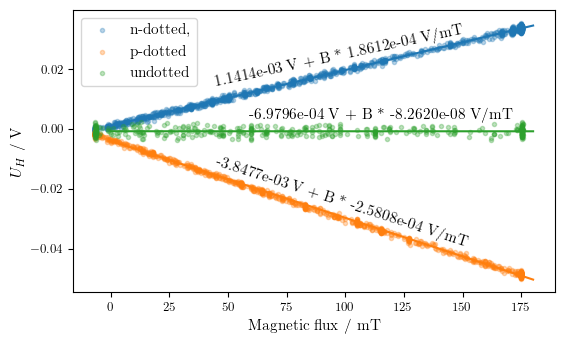

In [4]:
x = np.linspace(0,180)

plt.scatter(n['Magn. flux density B_A1 / mT'], n['Voltage U_B1 / V'],
           marker='.', alpha=.3,
           label='n-dotted, ')
plt.scatter(p['Magn. flux density B_A1 / mT'], p['Voltage U_B1 / V'],
           marker='.', alpha=.3,
           label='p-dotted')
plt.scatter(e['Magn. flux density B_A1 / mT'], e['Voltage U_B1 / V'],
           marker='.', alpha=.3,
           label='undotted')

plt.plot(x, linregress_n.intercept + linregress_n.slope * x)
plt.plot(x, linregress_p.intercept + linregress_p.slope * x)
plt.plot(x, linregress_e.intercept + linregress_e.slope * x)

plt.annotate(f'{linregress_n.intercept:.4e} V + B * {linregress_n.slope:.4e} V/mT', 
             xy=(x[int(len(x) / 4)], linregress_n.intercept + linregress_n.slope * x[int(len(x) / 4)]+0.005),
            rotation=12)

plt.annotate(f'{linregress_p.intercept:.4e} V + B * {linregress_p.slope:.4e} V/mT', 
             xy=(x[int(len(x) / 4)], linregress_p.intercept + linregress_p.slope * x[int(len(x) / 4)] - 0.024),
            rotation=-18)

plt.annotate(f'{linregress_e.intercept:.4e} V + B * {linregress_e.slope:.4e} V/mT', 
             xy=(x[int(len(x) / 3)], linregress_e.intercept + linregress_e.slope * x[int(len(x) / 3)] + 0.004),
            rotation=0)

plt.xlabel('Magnetic flux / mT')
plt.ylabel(r'$U_H$ / V')
plt.legend()
plt.tight_layout()
plt.savefig('build/V-B.pdf')